### implementing deep neural network using pytorch using Pytprch for image classifcation using MNIST database
Step 0: Prepare dataset, Set hyperparameters, Set device \
Step 1: Define your neural network  \
Step 2: Define loss and optimisation    \
Step 3: Training    \
Step 4: testing 

In [30]:
import torch
import torch.nn as nn       #all activation functions are available
import torchvision
import numpy as np

In [12]:
# loading our datasets
training_data =torchvision.datasets.MNIST(root='./data',download=True,transform=torchvision.transforms.ToTensor())       #default shuffle is True
testing_data =torchvision.datasets.MNIST(root='./data',download=True,transform=torchvision.transforms.ToTensor())      
# mnist is for handwritten texts

In [10]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=128,num_workers=2)        #num_workers is for parallel processing
test_loader = torch.utils.data.DataLoader(dataset=testing_data, batch_size=128,num_workers=2)        #num_workers is for parallel processing

In [14]:
example = iter(train_loader)
images,labels = next(example)


In [16]:
images.shape

torch.Size([128, 1, 28, 28])

In [19]:
labels.shape        #there are just 128 labels

torch.Size([128])

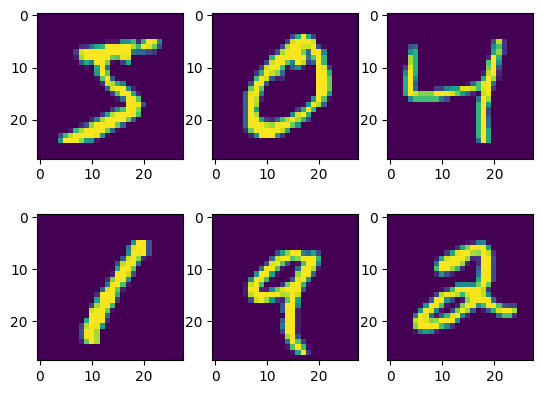

In [21]:
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i][0])

In [22]:
num_epochs = 3
learning_rate = 0.001
input_size = 784
hidden_unit = 500
output_unit = 10        #because there are 10 classes

In [23]:
device = torch.device('cude' if torch.cuda.is_available() else 'cpu')

In [24]:
device

device(type='cpu')

In [26]:
class Neural_Net(nn.Module):        #base class[nn.Module] for defining any neural network in pytorch 
    def __init__(self, input_size,hidden_unit,output_unit):
        super(Neural_Net, self).__init__()
        self.input_size = input_size

        self.l1 = nn.Linear(input_size,hidden_unit)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_unit, output_unit)
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out  


In [27]:
model = Neural_Net(input_size, hidden_unit, output_unit).to(device)

In [29]:
criterion = nn.CrossEntropyLoss      # automatically does one-hot encoding 
# a softmax layer is automatically added via crossEntropyLoss
optimizer = torch.optim.Adam(params = model.parameters(), lr=learning_rate)


In [ ]:
# training and testing phase
for epochs in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):
        # need to flatten the arrays
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)       #for forward propogation
        loss = criterion(outputs,labels)
        loss.backward()

        # now updation of weights
        optimizer.step()
        optimizer.zero_grad()       # so that the gradients do not get accumulated
